In [37]:
import pandas as pd
import numpy as np
import re
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("new_dataset.csv")

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    return text

'''def add_noise(text):
    words = text.split()
    if len(words) > 5:
        random.shuffle(words)  # Shuffle words randomly
    return " ".join(words)'''

# Combine 'title' and 'keywords' 
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)
#df['processed_text'] = df['processed_text'].apply(add_noise)

# Split dataset BEFORE vectorization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['processed_text'], df['Category'], test_size=0.2, random_state=42)

# Apply TF-IDF separately on train and test sets
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Using unigrams and bigrams
X_train = vectorizer.fit_transform(X_train_raw)  # Fit only on training data
X_test = vectorizer.transform(X_test_raw)  # Transform test data using the same vocabulary

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)

model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.981
Precision: 0.982
Recall: 0.981
F1-Score: 0.981

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        35
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         6

    accuracy                           0.98        52
   macro avg       0.97      0.99      0.98        52
weighted avg       0.98      0.98      0.98        52



In [46]:
import pandas as pd
import numpy as np
import re
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("new_dataset.csv")

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    return text

# Combine 'title' and 'keywords' for richer text representation
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Split dataset BEFORE vectorization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['processed_text'], df['Category'], test_size=0.2, random_state=42)

### **Bag of Words (BoW) Model**
vectorizer_bow = CountVectorizer()  # Using word counts
X_train_bow = vectorizer_bow.fit_transform(X_train_raw)
X_test_bow = vectorizer_bow.transform(X_test_raw)

# Train Random Forest
model_bow = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

# Evaluate Model
accuracy_bow = accuracy_score(y_test, y_pred_bow)
precision_bow = precision_score(y_test, y_pred_bow, average='weighted')
recall_bow = recall_score(y_test, y_pred_bow, average='weighted')
f1_bow = f1_score(y_test, y_pred_bow, average='weighted')

print(f"BoW Accuracy: {accuracy_bow:.3f}")
print(f"BoW Precision: {precision_bow:.3f}")
print(f"BoW Recall: {recall_bow:.3f}")
print(f"BoW F1-Score: {f1_bow:.3f}")

### **N-Grams (Bigrams) Model**
vectorizer_ngrams = TfidfVectorizer(ngram_range=(2,2))  # Using bigrams only
X_train_ngrams = vectorizer_ngrams.fit_transform(X_train_raw)
X_test_ngrams = vectorizer_ngrams.transform(X_test_raw)

# Train Random Forest
model_ngrams = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
model_ngrams.fit(X_train_ngrams, y_train)
y_pred_ngrams = model_ngrams.predict(X_test_ngrams)

# Evaluate Model
accuracy_ngrams = accuracy_score(y_test, y_pred_ngrams)
precision_ngrams = precision_score(y_test, y_pred_ngrams, average='weighted')
recall_ngrams = recall_score(y_test, y_pred_ngrams, average='weighted')
f1_ngrams = f1_score(y_test, y_pred_ngrams, average='weighted')

print(f"Bigrams Accuracy: {accuracy_ngrams:.3f}")
print(f"Bigrams Precision: {precision_ngrams:.3f}")
print(f"Bigrams Recall: {recall_ngrams:.3f}")
print(f"Bigrams F1-Score: {f1_ngrams:.3f}")



BoW Accuracy: 0.981
BoW Precision: 0.982
BoW Recall: 0.981
BoW F1-Score: 0.981
Bigrams Accuracy: 0.692
Bigrams Precision: 0.577
Bigrams Recall: 0.692
Bigrams F1-Score: 0.581


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
### **TriGrams Model**
vectorizer_ngrams = TfidfVectorizer(ngram_range=(3,3))  # Using bigrams only
X_train_ngrams = vectorizer_ngrams.fit_transform(X_train_raw)
X_test_ngrams = vectorizer_ngrams.transform(X_test_raw)

# Train Random Forest
model_ngrams = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
model_ngrams.fit(X_train_ngrams, y_train)
y_pred_ngrams = model_ngrams.predict(X_test_ngrams)

# Evaluate Model
accuracy_ngrams = accuracy_score(y_test, y_pred_ngrams)
precision_ngrams = precision_score(y_test, y_pred_ngrams, average='weighted')
recall_ngrams = recall_score(y_test, y_pred_ngrams, average='weighted')
f1_ngrams = f1_score(y_test, y_pred_ngrams, average='weighted')

print(f"Trigrams Accuracy: {accuracy_ngrams:.3f}")
print(f"Trigrams Precision: {precision_ngrams:.3f}")
print(f"Trigrams Recall: {recall_ngrams:.3f}")
print(f"Trigrams F1-Score: {f1_ngrams:.3f}")

Trigrams Accuracy: 0.673
Trigrams Precision: 0.453
Trigrams Recall: 0.673
Trigrams F1-Score: 0.542


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
### **N-Grams (Bigrams) Model**
vectorizer_ngrams = TfidfVectorizer(ngram_range=(2,2))  # Using bigrams only
X_train_ngrams = vectorizer_ngrams.fit_transform(X_train_raw)
X_test_ngrams = vectorizer_ngrams.transform(X_test_raw)

# Train Random Forest
model_ngrams = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
model_ngrams.fit(X_train_ngrams, y_train)
y_pred_ngrams = model_ngrams.predict(X_test_ngrams)

# Evaluate Model
accuracy_ngrams = accuracy_score(y_test, y_pred_ngrams)
precision_ngrams = precision_score(y_test, y_pred_ngrams, average='weighted')
recall_ngrams = recall_score(y_test, y_pred_ngrams, average='weighted')
f1_ngrams = f1_score(y_test, y_pred_ngrams, average='weighted')

print(f"Bigrams Accuracy: {accuracy_ngrams:.3f}")
print(f"Bigrams Precision: {precision_ngrams:.3f}")
print(f"Bigrams Recall: {recall_ngrams:.3f}")
print(f"Bigrams F1-Score: {f1_ngrams:.3f}")

Bigrams Accuracy: 0.692
Bigrams Precision: 0.577
Bigrams Recall: 0.692
Bigrams F1-Score: 0.581


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


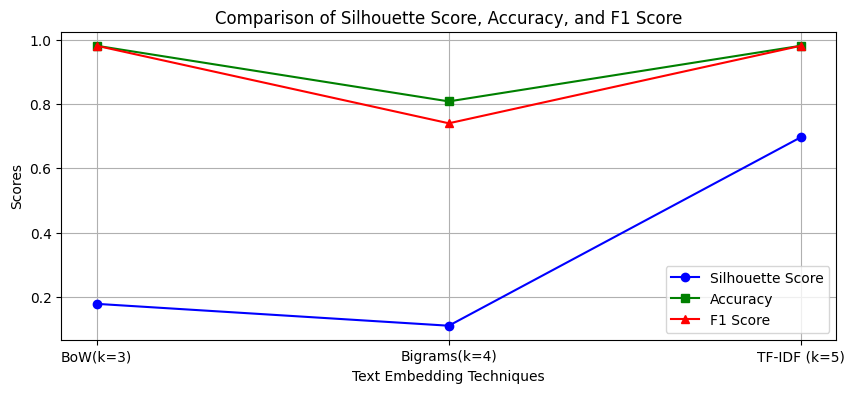

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data from the results table
embedding_methods = ["BoW(k=3)", "Bigrams(k=4)","TF-IDF (k=5)"]
silhouette_scores = [0.179, 0.111,0.697]  # Using available Silhouette Scores
accuracy_scores = [0.981, 0.808, 0.981]  # Missing values represented as None
f1_scores = [0.981, 0.74, 0.981]  # Missing values represented as None

# Convert None to NaN for handling missing values
silhouette_scores = np.array(silhouette_scores)
accuracy_scores = np.array([x if x is not None else np.nan for x in accuracy_scores])
f1_scores = np.array([x if x is not None else np.nan for x in f1_scores])

# Plot the data
plt.figure(figsize=(10, 4))

plt.plot(embedding_methods, silhouette_scores, marker='o', linestyle='-', color='blue', label="Silhouette Score")
plt.plot(embedding_methods, accuracy_scores, marker='s', linestyle='-', color='green', label="Accuracy")
plt.plot(embedding_methods, f1_scores, marker='^', linestyle='-', color='red', label="F1 Score")

# Adding labels and title
plt.xlabel("Text Embedding Techniques")
plt.ylabel("Scores")
plt.title("Comparison of Silhouette Score, Accuracy, and F1 Score")
plt.legend()
plt.grid(True)

# Display the graph
plt.show()
